# 聚类

给定下列数据集`noisy_circles`, `noisy_moons`, `blobs`，`no_structure`, `aniso`, `varied`。分别用`K-means`，` DBSCAN`和`GMM`算法实现聚类。比较不同算法的精度。

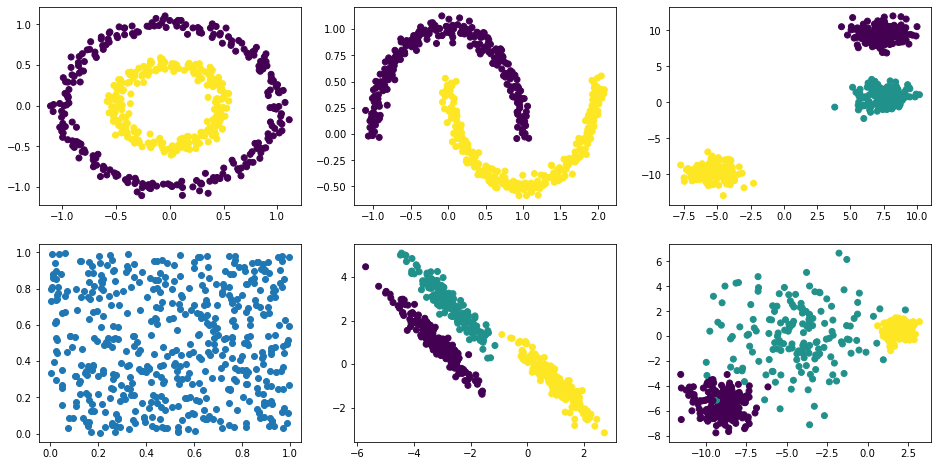

In [14]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ax[0,0].scatter(x=noisy_circles[0][:, 0], y=noisy_circles[0][:, 1], c=noisy_circles[1])
ax[0,1].scatter(x=noisy_moons[0][:, 0], y=noisy_moons[0][:, 1], c=noisy_moons[1])
ax[0,2].scatter(x=blobs[0][:, 0], y=blobs[0][:, 1], c=blobs[1])
ax[1,0].scatter(x=no_structure[0][:, 0], y=no_structure[0][:, 1], c=no_structure[1])
ax[1,1].scatter(x=aniso[0][:, 0], y=aniso[0][:, 1], c=aniso[1])
ax[1,2].scatter(x=varied[0][:, 0], y=varied[0][:, 1], c=varied[1])


[0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 0 0 0 1 